In [79]:
import sys
lib_path = '/home/jovyan/libs'
sys.path.insert(0, lib_path)

In [80]:
%reload_ext autoreload
%autoreload 2
import torch
from utils import audio, attention

from datasets import load_from_disk

In [81]:
dataset = load_from_disk("/home/jovyan/tedlium/validation.hf").with_format("torch").select(range(100))

In [82]:
model, processor = attention.init()

In [83]:
print(dataset[10])

{'audio': tensor([ 0.0033,  0.0018,  0.0003,  ...,  0.0005, -0.0027, -0.0020]), 'text': 'if they get surrounded they notice that too they might get a little flustered and they can also sense their motion and tilt'}


In [84]:
example = dataset[10]["audio"]

"""
Promising examples: 2, 3, 4, 10

Not promising examples: 1
""";

In [85]:
encoder_limit = int(example.size(0) / 16000 * 50) + 1
encoder_limit

466

In [86]:
audio.play_audio(example)

In [87]:
_, _, _, _, _, c_attns = attention.inference(example, model, processor, skip_special_tokens=True)

In [88]:
filename = None

cross_filename = None if not filename else filename + "_cross.png"
cross_truncated_filename = None if not filename else filename + "_cross_truncated.png"

# Cross Attentions

In [ ]:
c_attns_stacked_cutoff = torch.stack([torch.stack(c).squeeze() for c in c_attns[1:]]).permute(1, 2, 0, 3)[:, :, :, :encoder_limit]
attention.plot_attns(c_attns_stacked_cutoff, 8, 3, figsize=(30, 80))

Indices: [14, 90, 244]


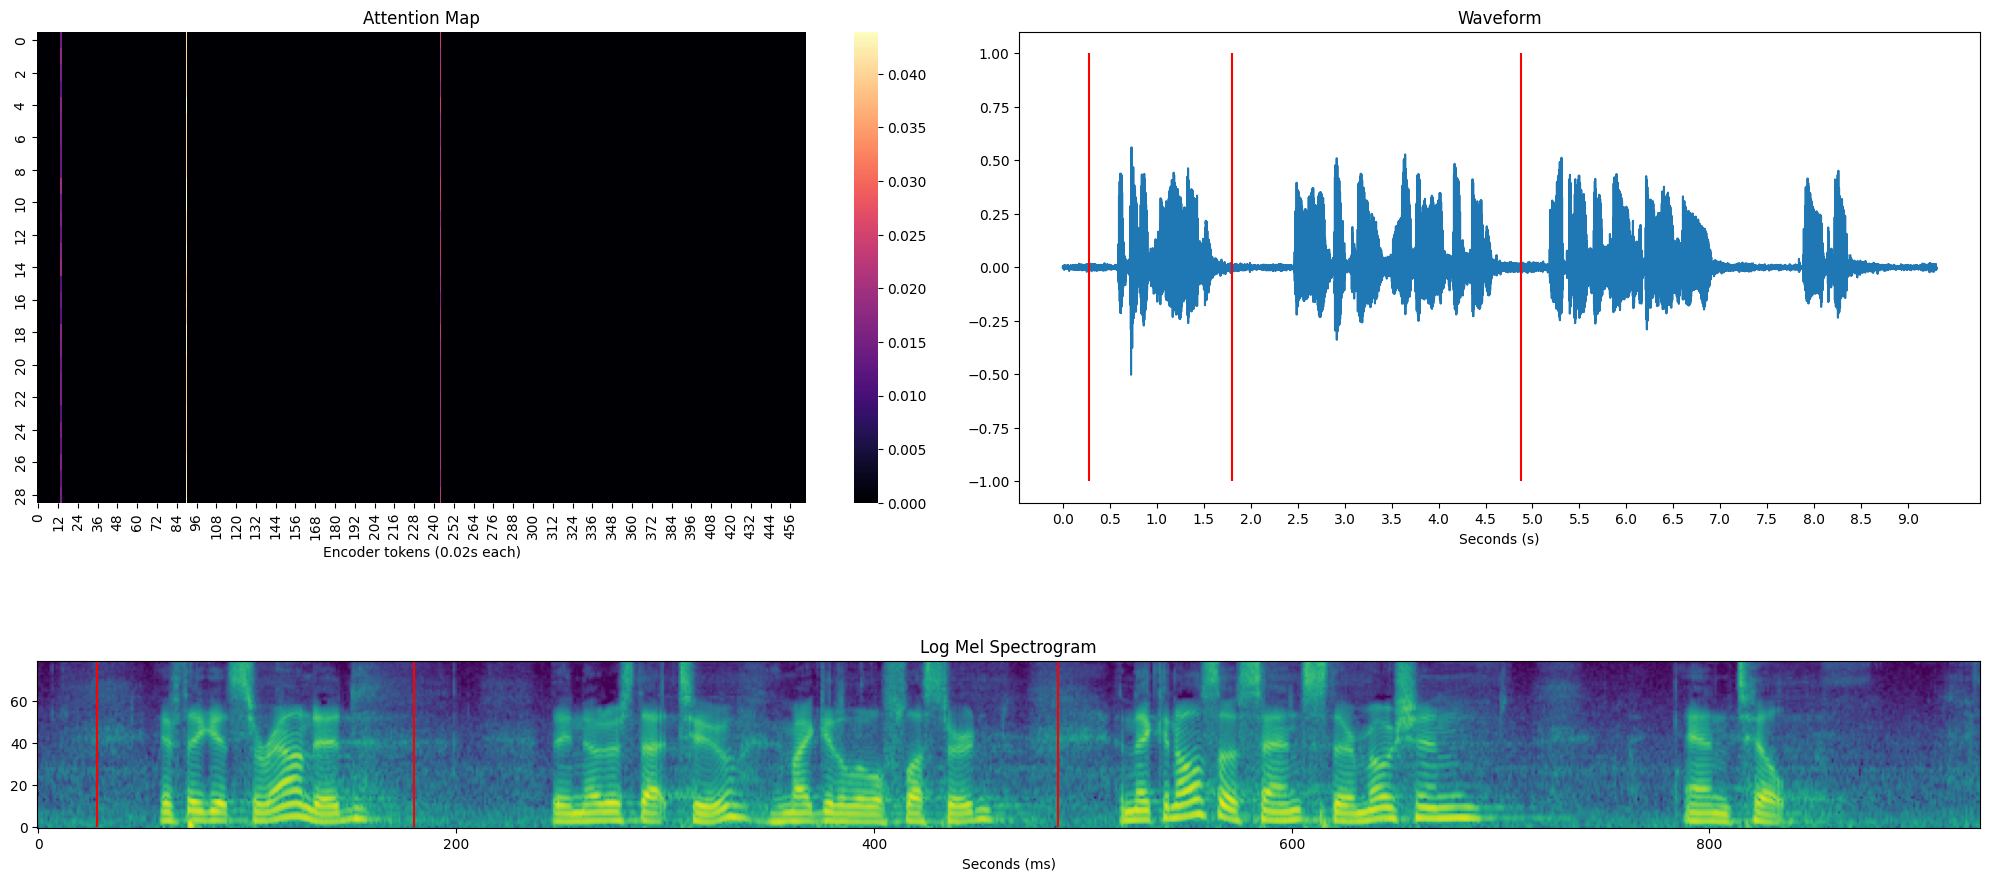

In [92]:
attention.plot_spikes(example, c_attns_stacked_cutoff[0, 2], 0.4, cmap="magma", figsize=(20, 10), filename="temp.png")

In [15]:
# attention.plot_attns(c_attns_stacked_cutoff, 6, 4)

In [ ]:
c_attns_stacked_cutoff.shape

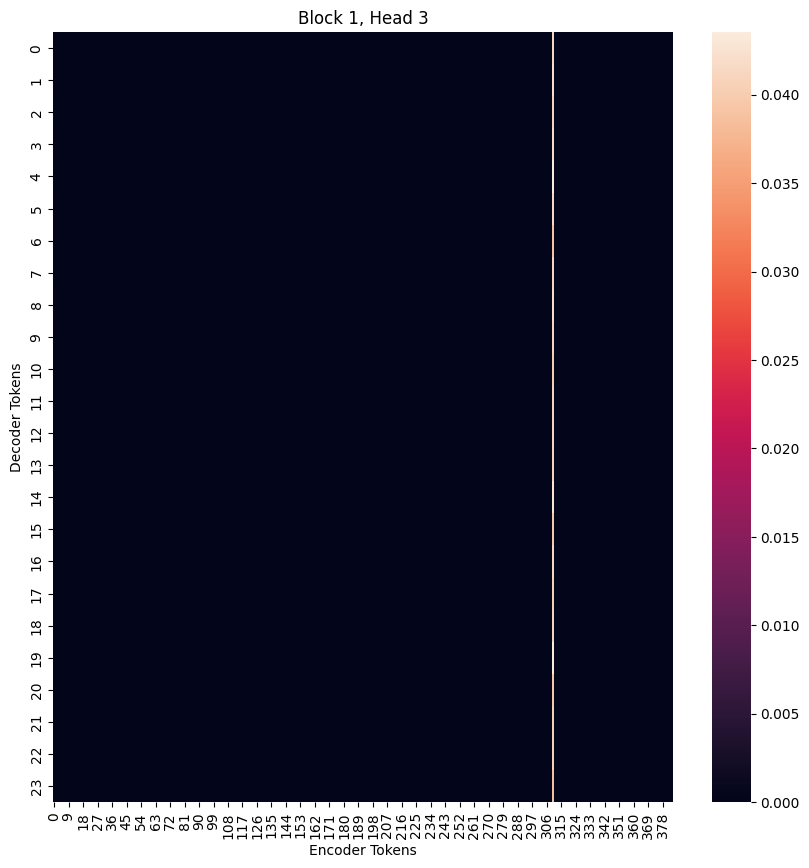

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

B, H = 0, 2

fig, ax = plt.subplots(figsize=(10, 10))
plt.title(f"Block {B + 1}, Head {H + 1}")
ax = sns.heatmap(c_attns_stacked_cutoff[B, H].cpu(), ax=ax)
ax.set_xlabel("Encoder Tokens")
ax.set_ylabel("Decoder Tokens")
# plt.savefig("temp.png")
plt.show()

In [ ]:
audio.play_audio(example[43:])